# Juan David Galan Vargas: 202111470

# Practica 4: Fotometria de Apertura

In [23]:
from glob import glob
from astropy.io import fits
from astropy.visualization import hist
from astropy.modeling import fitting
from astropy.modeling.models import custom_model
fitter = fitting.LevMarLSQFitter()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import scipy.ndimage as ndi
import astropy.stats as astrostats

# configuration
np.set_printoptions(linewidth=120) # para que se vea

cmap = plt.get_cmap("inferno")
cmap.set_bad(color="r")
cmap.set_over(color="w")
if "astro" in plt.colormaps():
    colormaps.unregister("astro")
colormaps.register(cmap,name="astro")
plt.rcParams["image.origin"] = "lower"
plt.rcParams["image.cmap"] = "astro"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.labelsize"] = 15



def quantile_linspace(arr,num=100,lower=0.01,upper=0.99):
    return np.linspace(*np.quantile(np.ravel(arr),[lower,upper]),num=num)

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

def quantile_hist(data,num=100,lower=0.01,upper=0.99):
    return plt.hist(np.ravel(data),bins=quantile_linspace(np.ravel(data),num,lower,upper))

def pseudomode(arr,sigma=1.6,maxiters=20):
    masked = astrostats.sigma_clip(arr,sigma=sigma,maxiters=maxiters)
    return arr[~masked.mask].mean()

In [24]:
glob("*")

['1sextansA_mask.fits',
 'aperture_photometry_1.ipynb',
 'datos',
 'Fotometria General.ipynb',
 'Fotometria.ipynb',
 'graficas',
 'Imagenes Reducidos',
 'Lab5.ipynb',
 'sextansA_mask.fits',
 'sextansA_PSF.npy']

In [25]:
dat = glob("Imagenes Reducidos/*.FITS")
dat

['Imagenes Reducidos\\M92 Blue 1 Reducido por Bias y Flat.fits',
 'Imagenes Reducidos\\M92 Blue2 Reducido por Bias y Flat.fits',
 'Imagenes Reducidos\\M92 Visual 1 Reducido por Bias y Flat.fits',
 'Imagenes Reducidos\\M92 Visual 2 Reducido por Bias y Flat.fits']

In [26]:
titles = {
    0: "Blue1",
    1: "Blue2",
    2: "Visual1",
    3: "Visual2"}

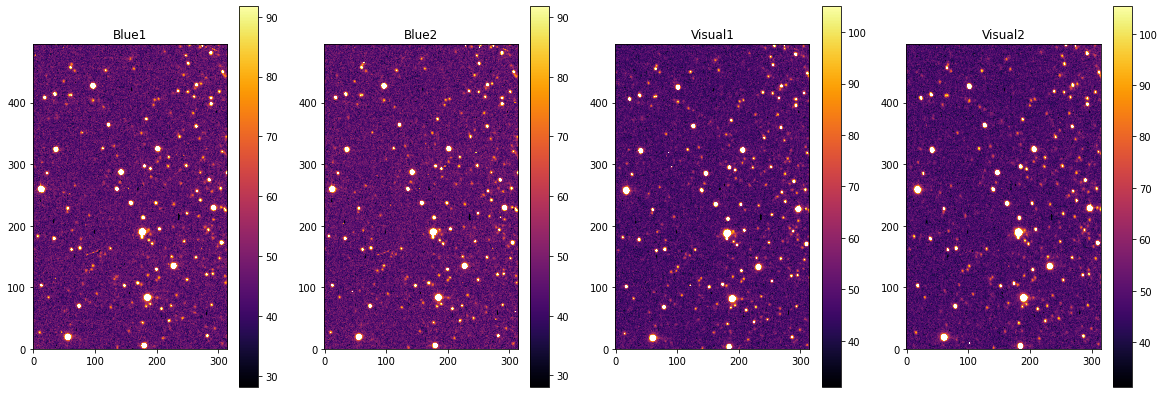

In [27]:
images = [fits.getdata(f) for f in dat]
fig,ax = plt.subplots(ncols=4,figsize=(20,7))
for i in range(4):
    plt.sca(ax[i])
    quantile_imshow(images[i])
    plt.title(titles[i])
    plt.colorbar()

In [28]:
headers = [fits.getheader(f) for f in dat]

In [29]:
headers

[SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                  -64 / array data type                                
 NAXIS   =                    2 / number of array dimensions                     
 NAXIS1  =                  315                                                  
 NAXIS2  =                  496                                                  
 OBJECT  = 'M-92 B  '            /                                               
 ORIGIN  = 'KPNO-IRAF'           /                                               
 DATE    = '17-09-93'            /                                               
 IRAFNAME= 'm92014.imh'          /  NAME OF IRAF IMAGE FILE                      
 IRAF-MAX=           4.942000E3  /  DATA MAX                                     
 IRAF-MIN=           4.800000E2  /  DATA MIN                                     
 IRAF-BPX=                   16  /  DATA BITS/PIXEL                              
 IRAFTYPE= 'SHOR

In [30]:
from skimage.feature import peak_local_max
from photutils.centroids import centroid_sources, centroid_quadratic

In [31]:
from photutils.aperture import CircularAperture, ApertureStats
from photutils.profiles import RadialProfile
from astropy.modeling.models import Gaussian1D,Voigt1D,Const1D
from astropy.modeling.fitting import LevMarLSQFitter
fitter = LevMarLSQFitter(calc_uncertainties=True)

In [32]:
from sklearn.neighbors import NearestNeighbors

In [33]:
from photutils.aperture import CircularAnnulus

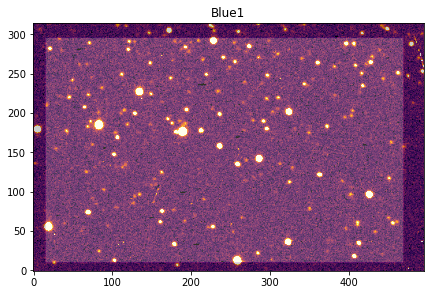

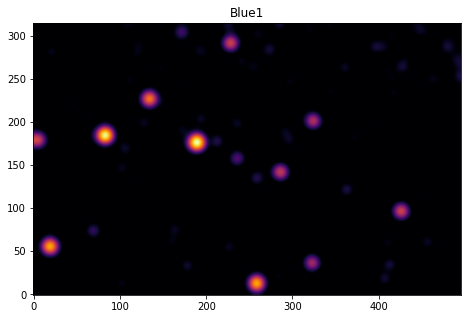

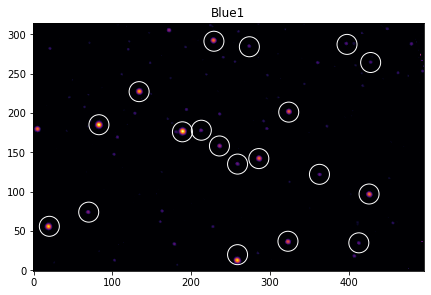

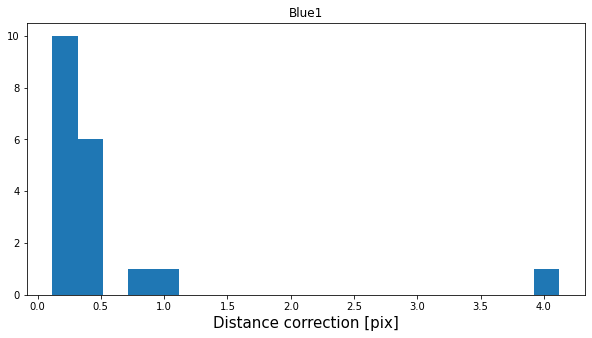

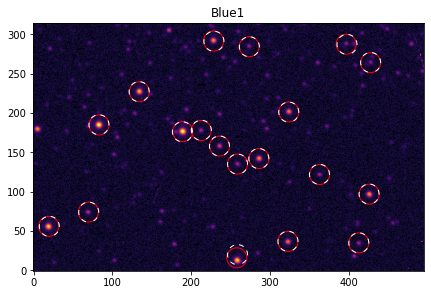

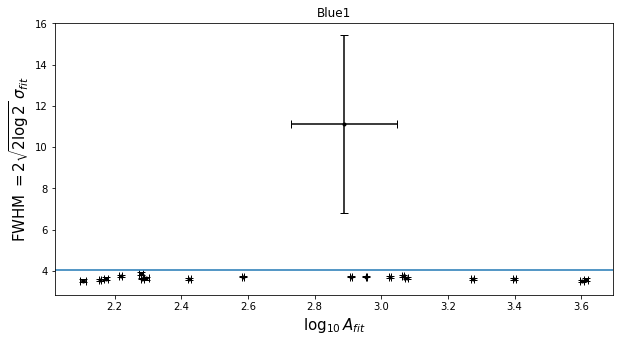

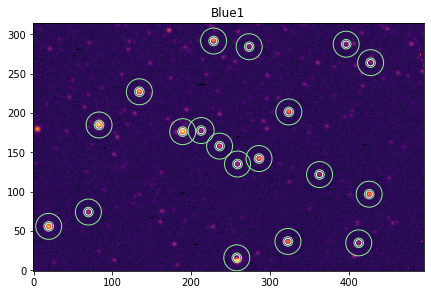

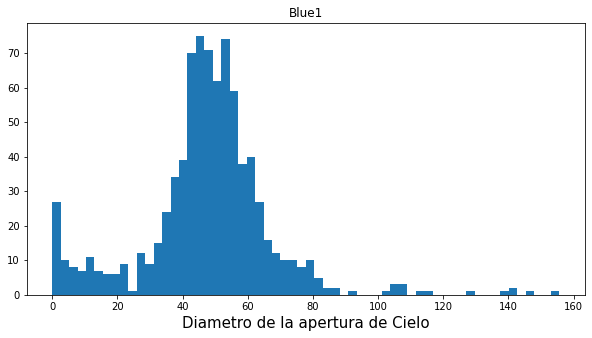

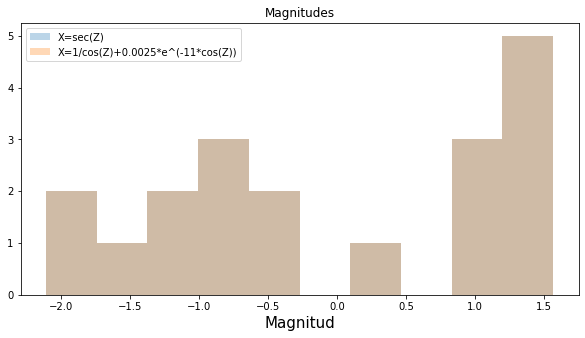

19
[-2.11111596 -2.04767224 -1.57009601 -1.26125167 -0.80224684 -0.77953074 -0.68454552 -1.2110789  -0.51484247
 -0.39425333  0.42562361  0.8667376   1.11249435  1.15329076  1.2000607   1.49039468  1.56771397  1.3262741
  1.45736984]
[-1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07
 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07
 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07]
[1.1304266  1.13279279 1.1540357  1.17608298 1.21445574 1.22028066 1.22833717 1.17986934 1.25104526 1.26787806
 1.4434616  1.59099385 1.70209506 1.72454111 1.735147   1.9100604  1.96197688 1.81303215 1.89027847]
[-1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07
 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07
 -1.67045886e-07 -1.

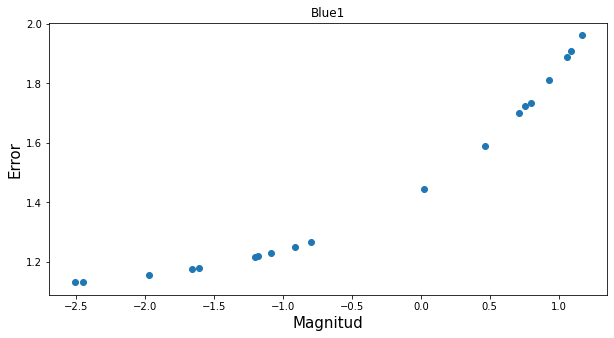

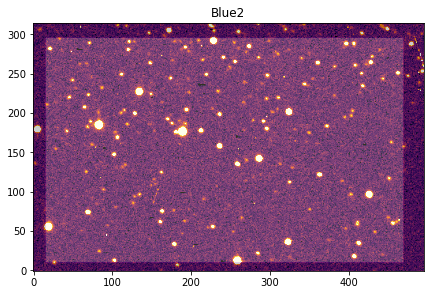

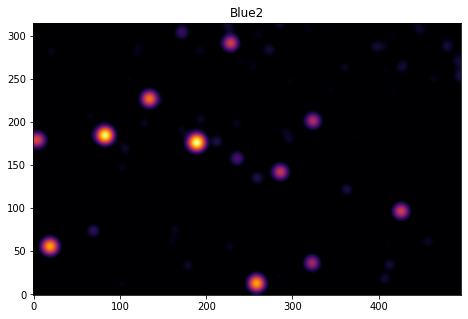

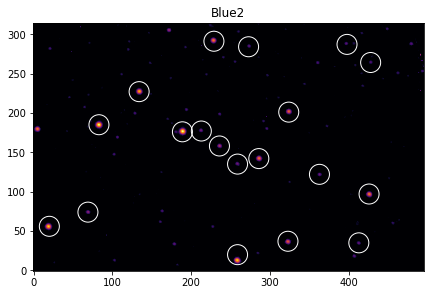

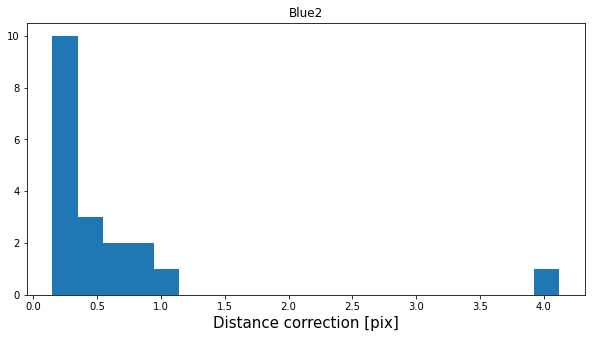

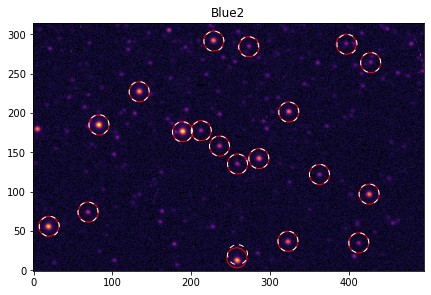

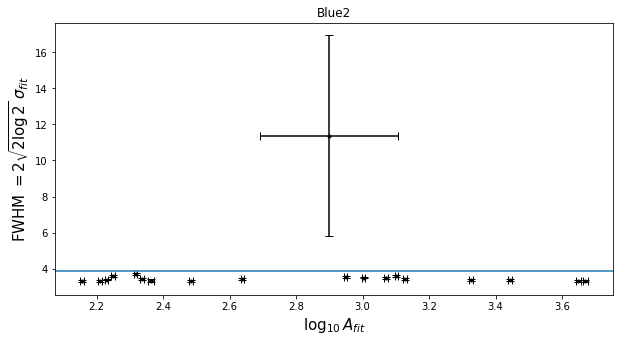

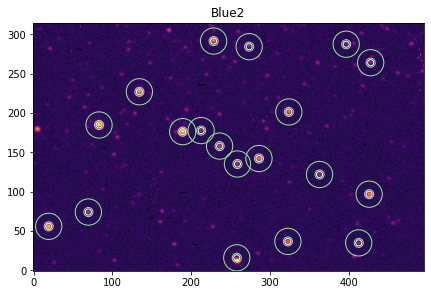

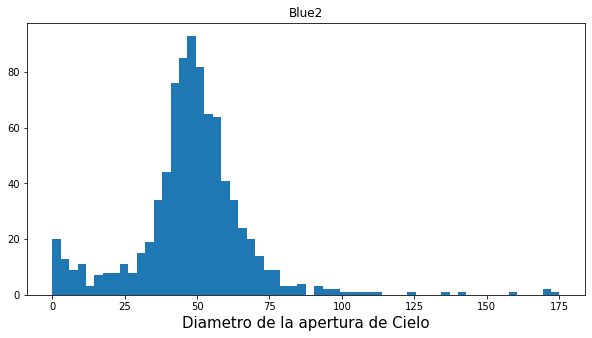

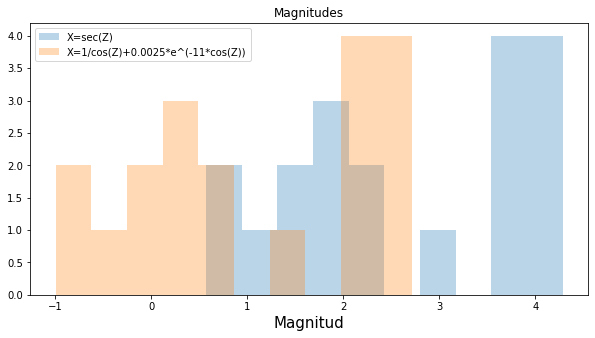

19
[0.57202897 0.63947828 1.11033809 1.42479289 1.88226117 1.89759464 2.01001188 1.51599046 2.17106871 2.29313453
 3.10960634 3.55821461 3.8129361  3.83753587 3.88139382 4.00682783 4.20548798 4.2859721  4.16778269]
[1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171
 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171]
[1.1256381  1.12766911 1.14697138 1.1669463  1.20189708 1.20501191 1.21857848 1.17344185 1.23632223 1.25172465
 1.4110833  1.55346421 1.66546418 1.66957974 1.688964   1.74264156 1.86769433 1.90993613 1.85103662]
[1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171
 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171]


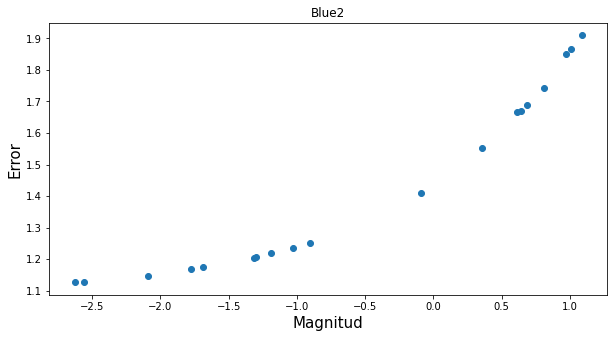

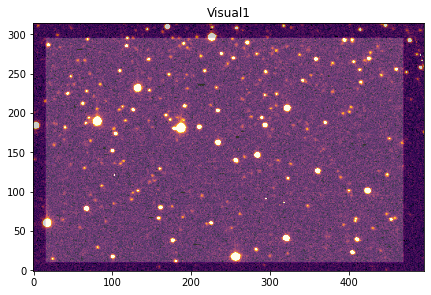

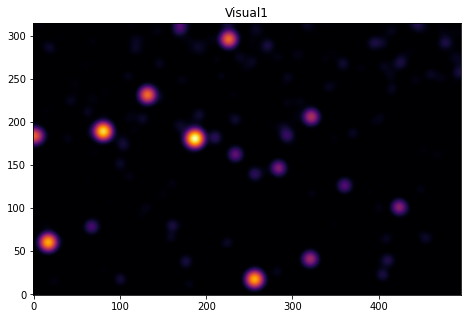

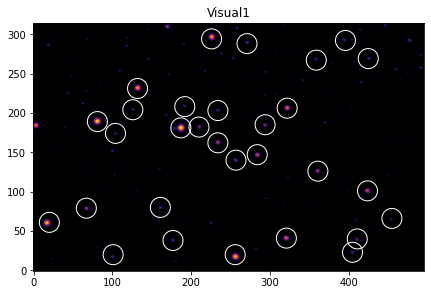

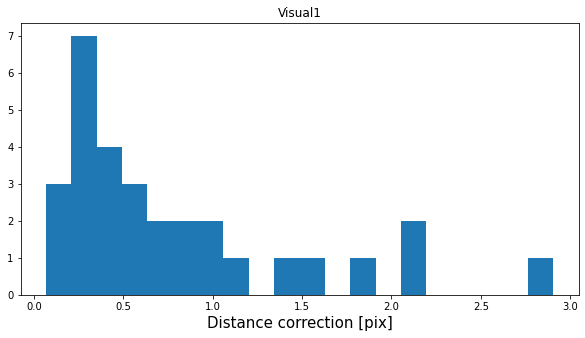

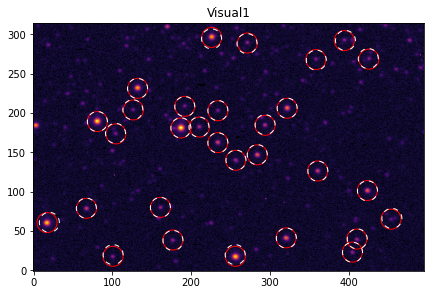

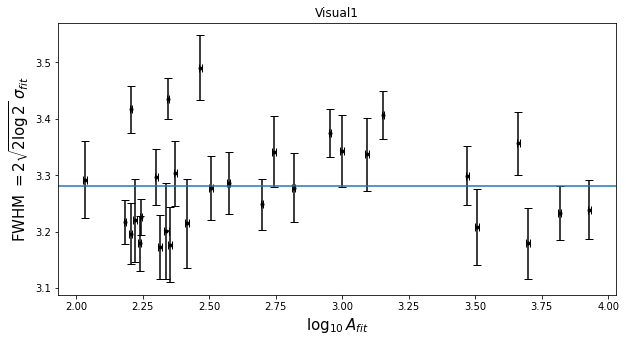

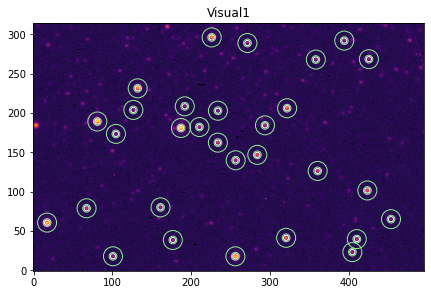

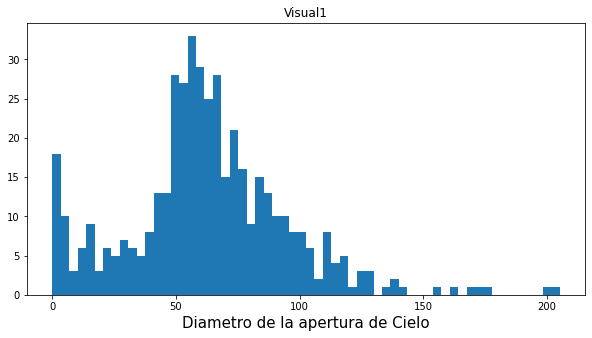

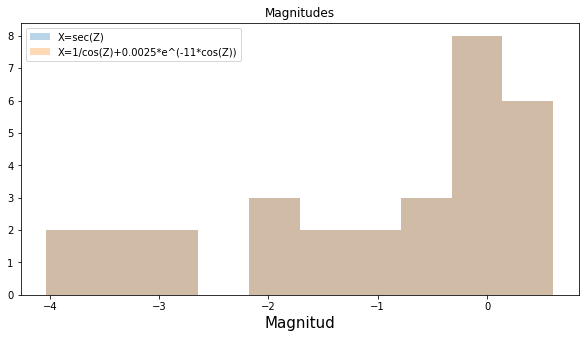

30
[-4.03628624 -3.75117066 -3.42814428 -3.43707243 -2.97737696 -2.92120746 -2.16717236 -1.99956499 -1.76251551
 -1.65818429 -1.28239239 -1.13364878 -0.96274244 -0.66452762 -0.4995766  -0.493309   -0.25808655  0.01357942
  0.13187335 -0.16847973 -0.08064534 -0.16038716 -0.05304942  0.19288612  0.29549177  0.22732678  0.011237
  0.19350825  0.60573154  0.34598156]
[-1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07
 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07
 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07
 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07
 -1.2127276e-07 -1.2127276e-07]
[1.10918672 1.11469896 1.12095494 1.12162316 1.13653287 1.13852385 1.1847639  1.19986561 1.22346656 1.23433264
 1.29156862 1.31586066 1.35276658 1.44190276 1.47457368 1.47740691 

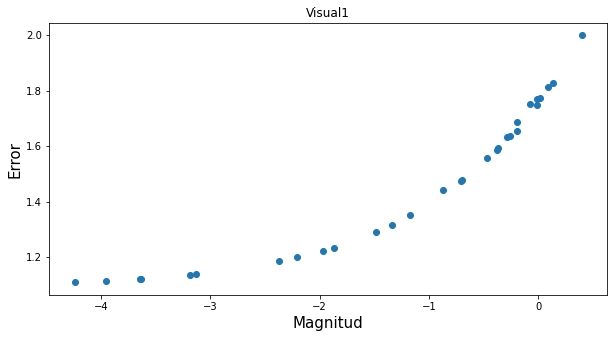

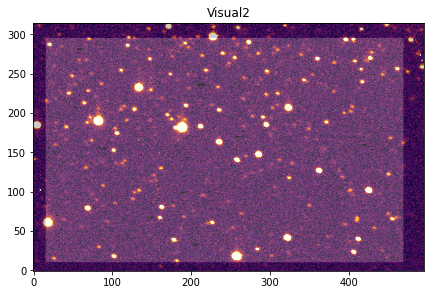

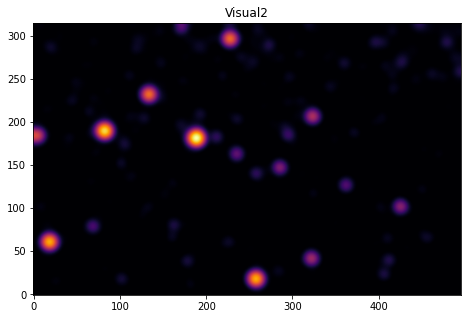

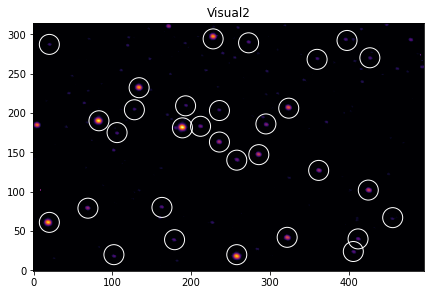

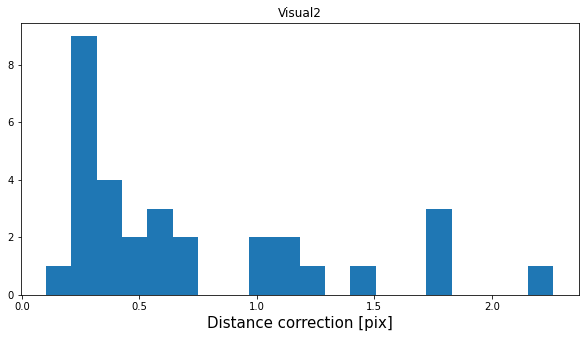

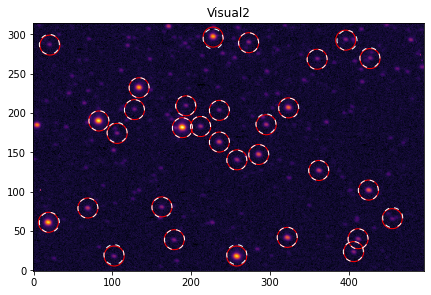

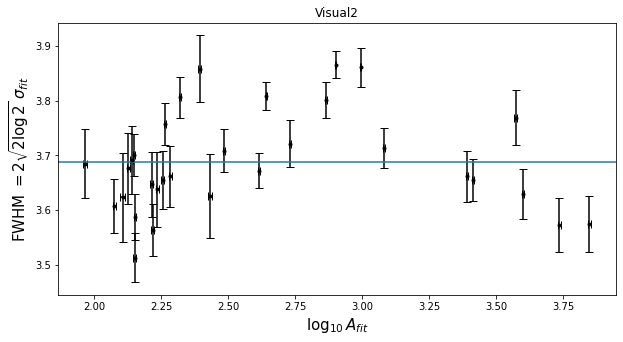

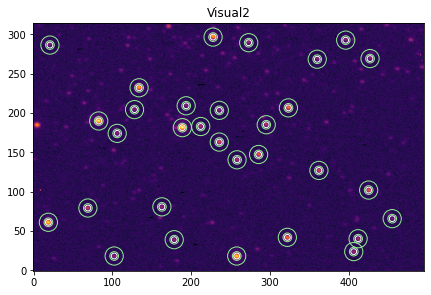

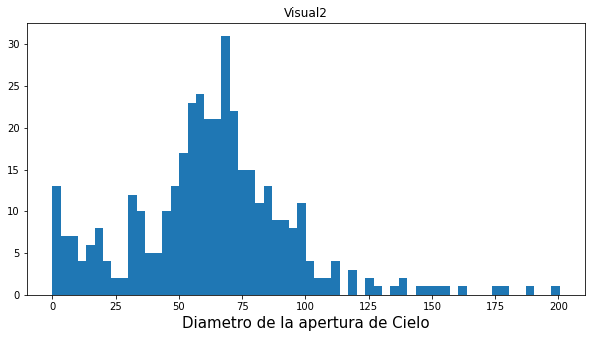

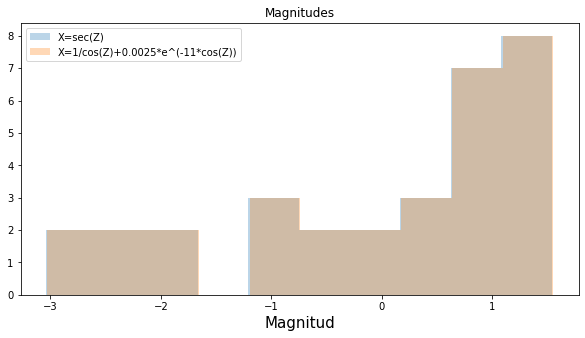

31
[-3.04124711 -2.75307085 -2.44158153 -2.43740243 -1.98314992 -1.93027723 -1.17281996 -1.01467335 -0.77457359
 -0.66617388 -0.30571906 -0.10468657  0.00813772  0.32798772  0.47068974  0.47706552  0.70051428  1.10806465
  0.89153711  1.02131986  0.85091385  0.83894906  0.95042132  1.16696119  1.02773026  1.16726483  1.22539291
  1.28836733  1.38563725  1.22002476  1.54342678]
[-0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818
 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818
 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818
 -0.01258818 -0.01258818 -0.01258818 -0.01258818]
[1.11601974 1.12251071 1.13082532 1.13069484 1.15026004 1.15187106 1.20840555 1.22233505 1.25320829 1.26785532
 1.33238932 1.37811144 1.40434486 1.50765011 1.5461988  1.53985112 1.63426417 1.86891516 1.73784297 1.82128762
 1.69698279 1.6931071

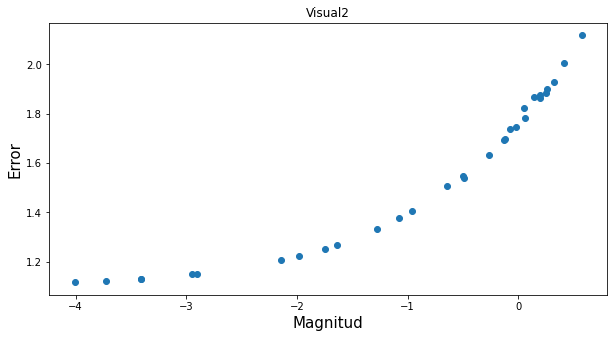

In [34]:
for i in range(len(images)):
    img=images[i]
    X,Y = np.mgrid[:img.shape[0],:img.shape[1]]
    mask = (X>15) & (X<470) & (Y>10) & (Y<295)


    plt.figure(figsize=(7,7))
    quantile_imshow(img.T)#,vmin=300,vmax=600)
    plt.imshow(mask.T,alpha=0.2)
    plt.title(titles[i])
    plt.show()
    plt.imshow(ndi.gaussian_filter(img,5).T,vmin=50,norm="log")
    plt.title(titles[i])
    plt.show()


    peaks = peak_local_max(
        ndi.gaussian_filter(img,5),
        threshold_abs=60,
        labels=mask*1,
        min_distance=7,
        exclude_border=20)
    

    plt.figure(figsize=(7,7))
    plt.imshow(img.T,vmin=70,norm="log")    
    plt.scatter(*peaks.T,fc="none",ec="w",s=400)
    plt.title(titles[i])
    plt.show()

    centroids = np.array(
    centroid_sources((img-img.mean()).T,*peaks.T,centroid_func=centroid_quadratic,box_size=9)).T
    distances = np.hypot(*(peaks-centroids).T)
    plt.hist(distances,bins=20);
    plt.xlabel("Distance correction [pix]")
    plt.title(titles[i])
    plt.show()

    plt.figure(figsize=(7,7))
    plt.imshow(img.T,vmin=30,norm="log")
    plt.scatter(*centroids.T,fc="none",ec="r",s=400)
    plt.scatter(*peaks.T,fc="none",ec="w",s=400,linestyle=(5,(5,5)))
    plt.title(titles[i])
    plt.show()

    model = Const1D(100) + Gaussian1D(5e3,0,1.5)
    model.mean_1.fixed = True
    radii = np.arange(0,10,1)
    profile = RadialProfile(img.T,centroids[0],radii)
    fitted_model = fitter(model,profile.radius,profile.profile)

    params = []
    params_std = []
    for c in centroids:
        try:
            profile = RadialProfile(img.T,c,radii)
            fitted_model = fitter(model,profile.radius,profile.profile)
            params_std.append(np.sqrt(np.diag(fitter.fit_info["param_cov"])))
            params.append(fitted_model.parameters)
        except ValueError:
            pass
    #plt.plot(profile.radius,profile.gaussian_profile)
    #plt.plot(profile.radius,profile.profile,". k")
    #plt.show()
    #plt.close()

    params = np.asarray(params)
    params_std = np.asarray(params_std)


    x = np.log10(params.T[1])
    y = 2*np.sqrt(2*np.log(2))*params.T[3]
    dx = params_std.T[1]/params.T[1] / np.log(10)
    dy = 2*np.sqrt(2*np.log(2))*params_std.T[2]
    samples = np.random.normal(loc=y,scale=dy,size=(10_000,len(y)))
    means = samples.mean(axis=1)
    FWHM = means.mean()
    FWHM_err = means.std()

    plt.errorbar(x,y,dy,dx,fmt=". k",capsize=4)
    plt.xlabel("$\\log_{10} A_{fit}$")
    plt.ylabel("FWHM $= 2\\sqrt{2\\log 2}\\;\\sigma_{fit}$")
    plt.axhline(FWHM)
    plt.title(f"FWHM mean = ${FWHM:.3f}\\pm{FWHM_err:.3f}$")
    plt.title(titles[i])
    plt.show()

    min_distance=NearestNeighbors(n_neighbors=2).fit(centroids).kneighbors(centroids)[0][:,1].min()
    sky_apertures=CircularAnnulus(centroids,1.5*FWHM,0.85*(min_distance-FWHM))
    star_apertures=CircularAperture(centroids,FWHM)
    plt.figure(figsize=(7,7))
    plt.imshow(img.T,vmin=20,norm="log")
    sky_apertures.plot(color="lightgreen")
    star_apertures.plot(color="w")
    plt.title(titles[i])
    plt.show()

    sky_values=ApertureStats(img.T,sky_apertures).median
    star_values=ApertureStats(img.T,star_apertures).sum/star_apertures.area
    sky_values_err = ApertureStats(img.T,sky_apertures, sigma_clip=astrostats.SigmaClip()).median
    star_values_err = ApertureStats(img.T, star_apertures).sum / star_apertures.area
    sky=sky_apertures[0].to_mask().get_values(img.T)
    plt.hist(sky,60)
    plt.title(titles[i])
    plt.xlabel("Diametro de la apertura de Cielo")
    plt.show()

    mag_instr=-2.5*np.log10((star_values-sky_values)/headers[i]["EXPTIME"])
    

    Z=headers[i]["ZD"]
    Z1=float(Z[0:2])
    Z2=float(Z[3:5])/60
    Z3=float(Z[6:11])/(60*60)
    Z_def=Z1+Z2+Z3
    Z_def=(Z_def*180/np.pi)
    X1=abs(1/(np.cos(Z_def)+(0.025*np.exp(-11*np.cos(Z_def)))))
    X2=abs(1/(np.cos(Z_def)))
    if i <=1:
        k=0.4
    else:
        k=0.2
    mag1=mag_instr+(k*X1)
    mag2=mag_instr+(k*X2)
    dif_mag=mag1-mag2
    plt.hist(mag1,alpha=0.3,label="X=sec(Z)")
    plt.hist(mag2,alpha=0.3,label="X=1/cos(Z)+0.0025*e^(-11*cos(Z))")
    plt.title("Magnitudes")
    plt.xlabel("Magnitud")
    plt.legend()
    plt.show()
    print(len(mag1))
    print(mag1)
    print(dif_mag)
    error=(5/2)*(1/np.log(10))*(np.sqrt((star_values_err**2)-(sky_values_err**2))/abs(sky_values-star_values))
    print(error)
    print(dif_mag)
    plt.scatter(mag_instr,error)
    plt.xlabel("Magnitud")
    plt.ylabel("Error")
    plt.title(titles[i])
    plt.show()
    


In [35]:
glob("*")

['1sextansA_mask.fits',
 'aperture_photometry_1.ipynb',
 'datos',
 'Fotometria General.ipynb',
 'Fotometria.ipynb',
 'graficas',
 'Imagenes Reducidos',
 'Lab5.ipynb',
 'sextansA_mask.fits',
 'sextansA_PSF.npy']

In [36]:
dat = glob("datos\*.FITS")
dat

['datos\\Alcyone.fits', 'datos\\M92.fits', 'datos\\sextans_A.fits']

In [37]:
M92={x.name:x.data.astype(float) for x in fits.open("datos\M92.fits")}
#headers = [fits.getheader(f) for f in M92]
headers = {hdu.name: hdu.header for hdu in fits.open("datos\M92.fits")}
keys_M92 = list(M92.keys())

In [38]:
headers

{'BIAS 25': SIMPLE  =                    T  /  FITS STANDARD                                
 BITPIX  =                   16  /  FITS BITS/PIXEL                              
 NAXIS   =                    2  /  NUMBER OF AXES                               
 NAXIS1  =                  318                                                  
 NAXIS2  =                  507                                                  
 EXTEND  =                    T                                                  
 BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
 BZERO   =       0.0000000000E0  /                                               
 OBJECT  = 'ave of 25 bias'      /                                               
 ORIGIN  = 'KPNO-IRAF'           /                                               
 DATE    = '17-09-93'            /                                               
 IRAFNAME= 'm92001.imh'          /  NAME OF IRAF IMAGE FILE                      
 IRAF

In [39]:
images=M92

In [40]:
def bias_model(x,y,/,m=0,b=1000,A=300,c=100,n=1):
    return m*x + b + n*x**2 + A*np.exp(-y/c)
BiasModel = custom_model(bias_model)
bias_model = BiasModel()

bias = images["BIAS 25"]
X,Y = np.mgrid[:bias.shape[0],:bias.shape[1]]
bias_model = fitter(bias_model,X,Y,bias)(X,Y)

flat = images["FLAT V 5"]
flat -= bias_model
flat /= flat.mean()

nombres={0:"B 1",1:"B 2", 2:"V 1", 3:"V 2"}

In [41]:
from photutils.utils import calc_total_error

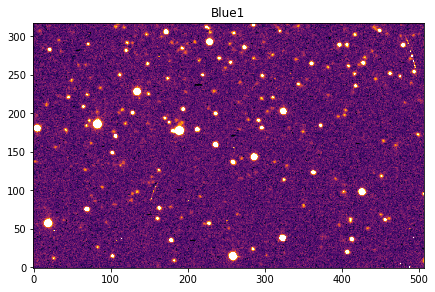

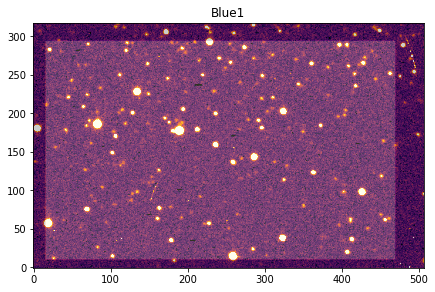

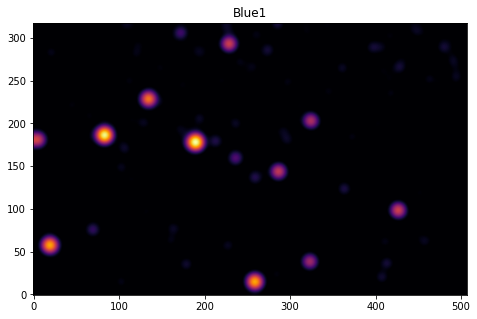

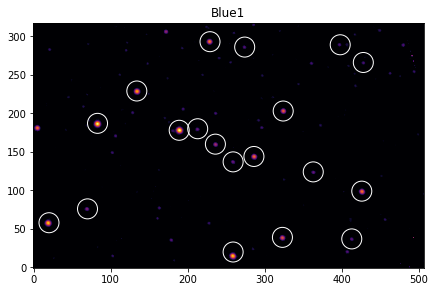

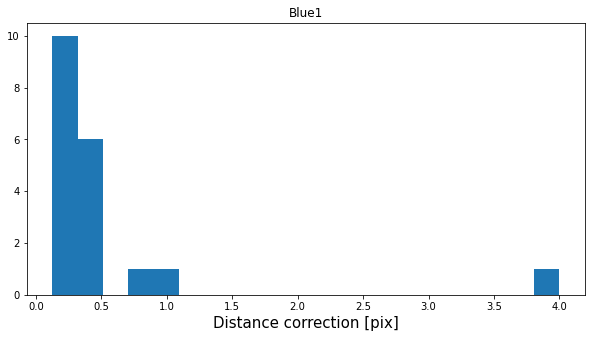

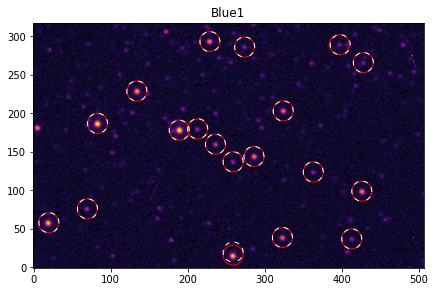

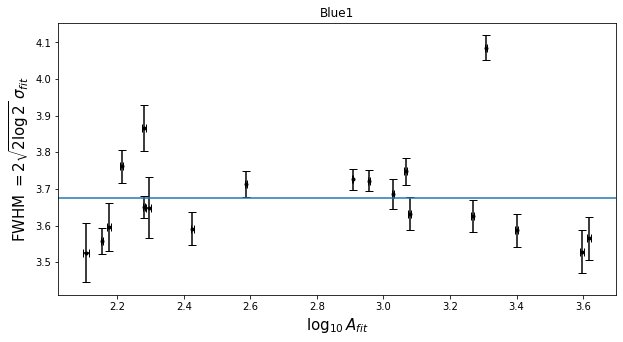

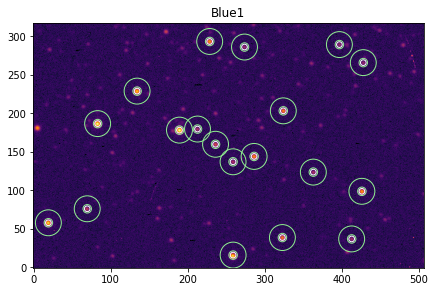

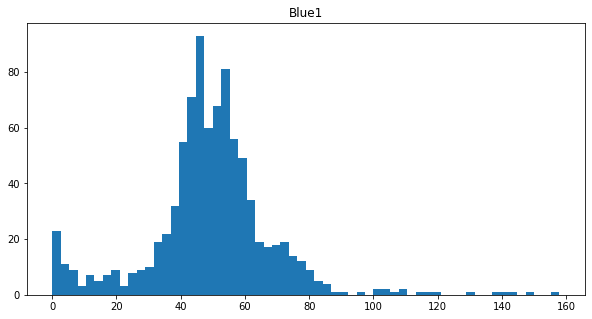

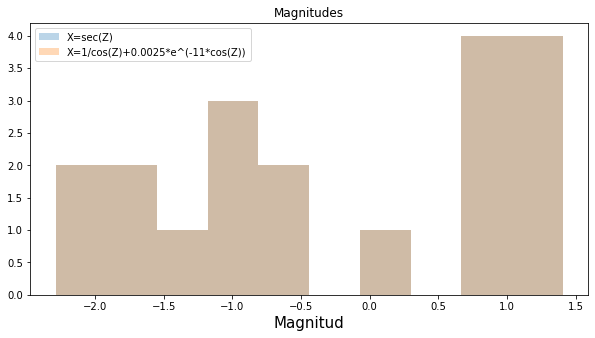

19
[-2.28633381 -2.21775064 -1.74684095 -1.43069272 -1.71706726 -0.97527847 -0.95219482 -0.858506   -0.6919057
 -0.56642988  0.24893581  0.69421884  0.93765988  0.99081951  1.0350439   1.3296908   1.40645442  1.16298231
  1.28753208]
[1.12417671 1.12615413 1.14418671 1.16351844 1.14529779 1.19672011 1.20226202 1.20880741 1.22796355 1.24201875
 1.39785191 1.52906113 1.62955282 1.65494622 1.66265686 1.81633542 1.86170315 1.72669624 1.79545661]
[-1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07
 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07
 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07 -1.67045886e-07]


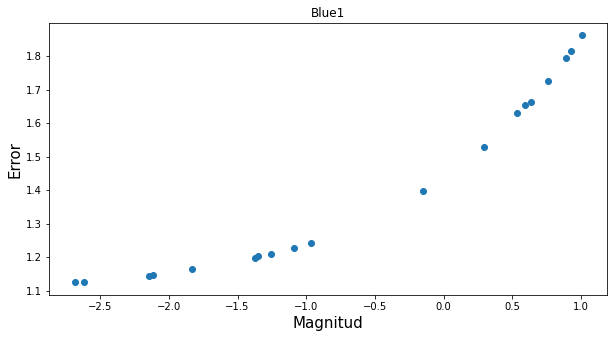

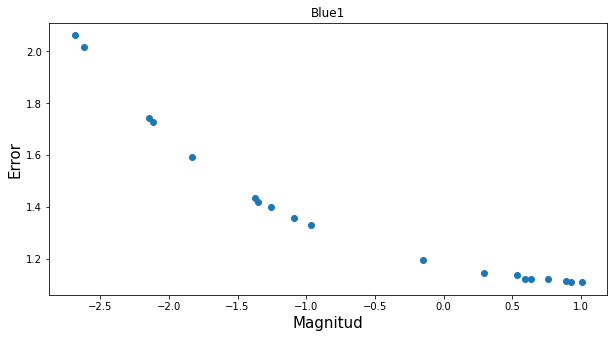

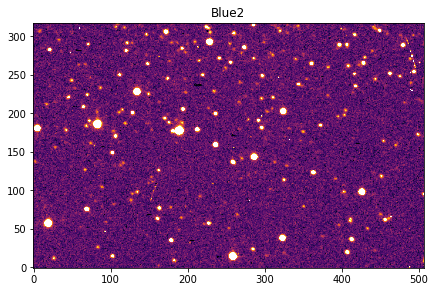

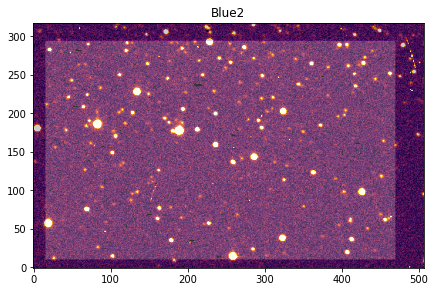

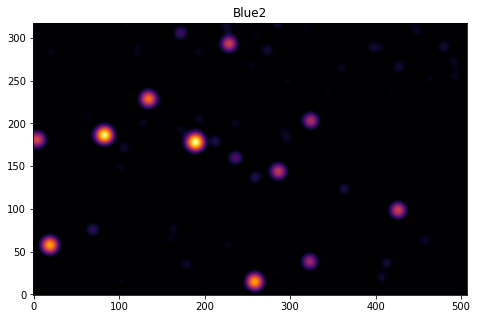

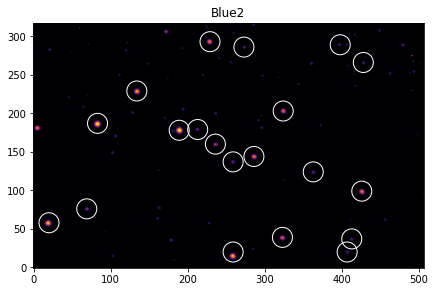

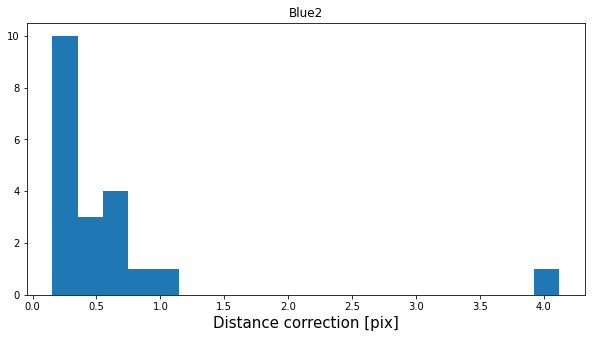

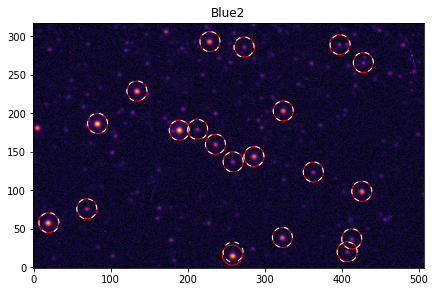

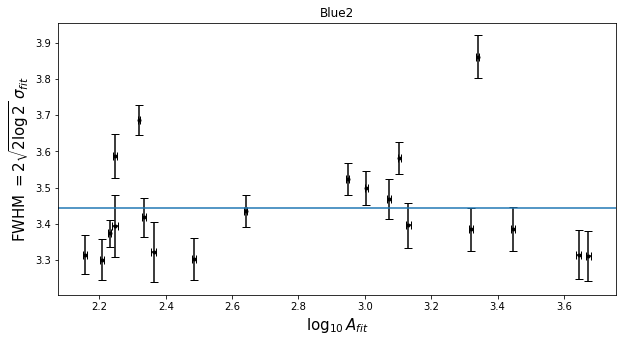

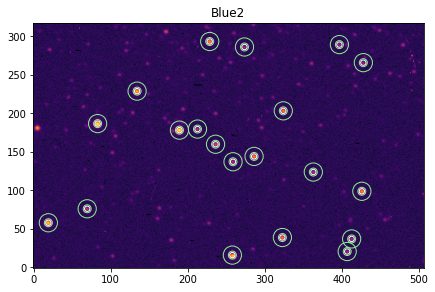

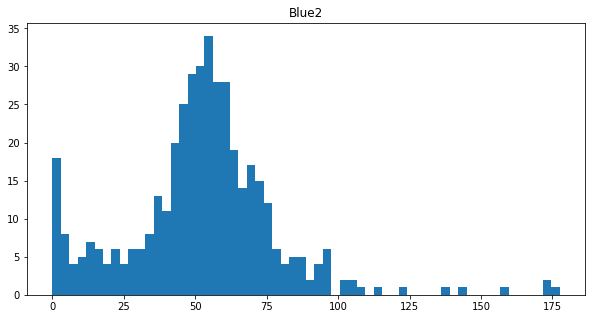

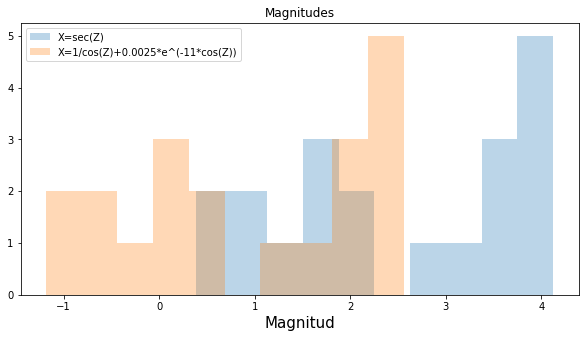

20
[0.38062569 0.4553176  0.92244778 1.24019643 0.98419026 1.69770735 1.70788097 1.82261861 1.98277838 2.11178605
 2.91924893 3.36692802 3.6183021  3.6459671  3.68905775 3.8332397  3.9771466  4.04605232 4.12432077 3.91336661]
[1.12330431 1.12434115 1.14121087 1.15858053 1.14351117 1.18846121 1.18922148 1.2026051  1.21675307 1.23136191
 1.36797639 1.49224668 1.58839809 1.59383511 1.60847417 1.65839119 1.74813052 1.7930088  1.8350677  1.69558918]
[1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171
 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171 1.56697171]


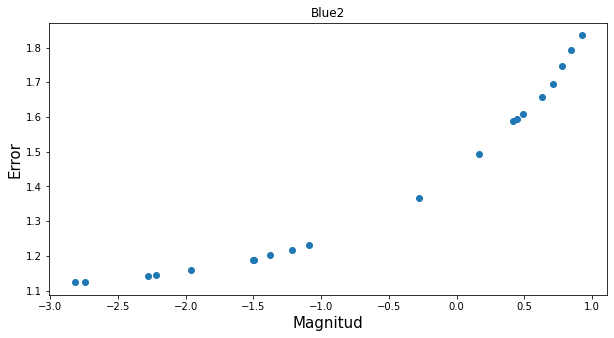

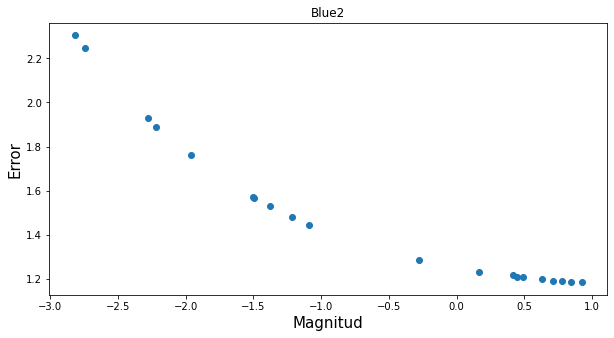

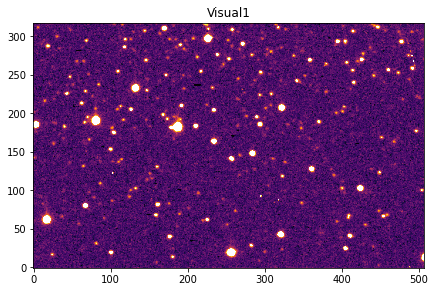

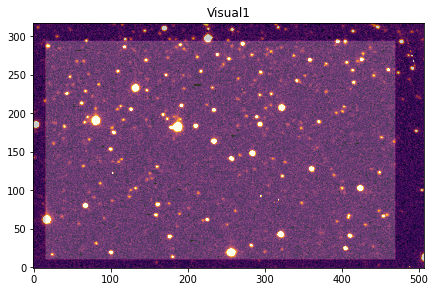

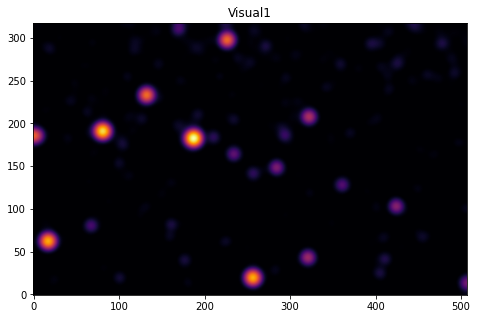

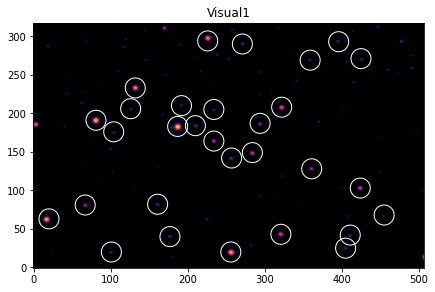

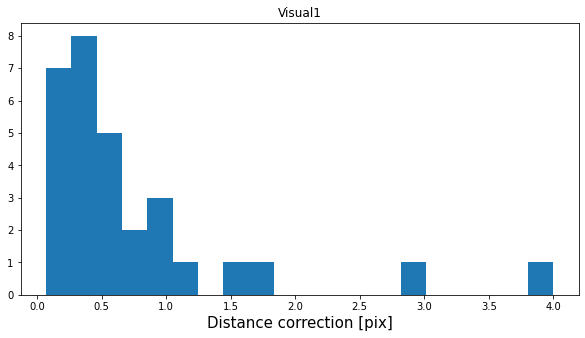

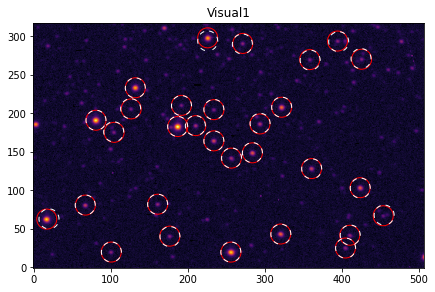

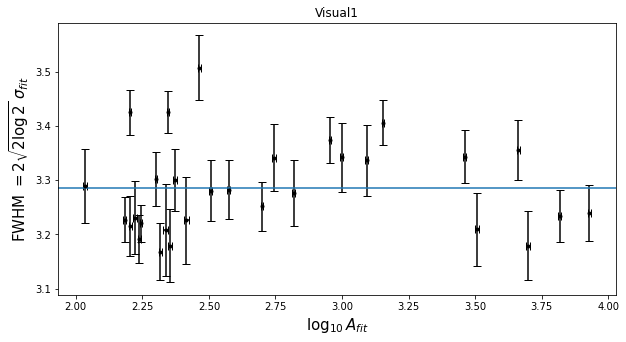

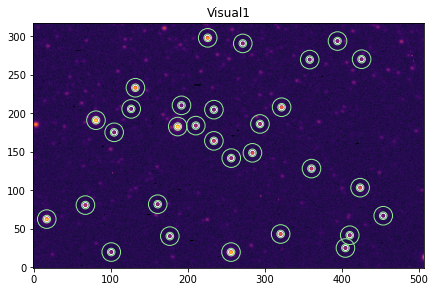

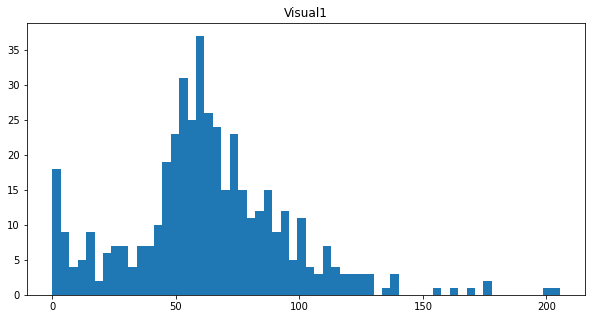

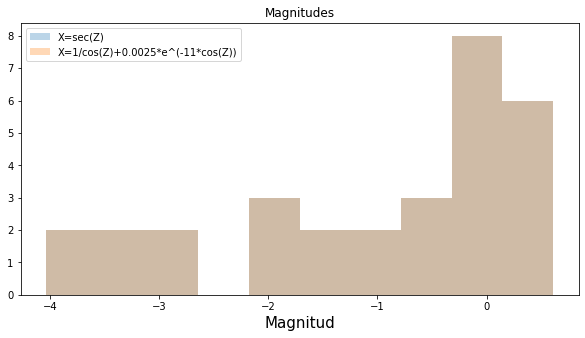

30
[-4.03476999 -3.74968931 -3.4271559  -3.4354379  -2.9752924  -2.91121696 -2.1657829  -1.99764399 -1.76061947
 -1.655539   -1.2802902  -1.13103519 -0.96290562 -0.66431973 -0.49723759 -0.49092602 -0.25984532  0.01648991
  0.12898999 -0.16863436 -0.08067224 -0.15651519 -0.05337868  0.19409958  0.00635142  0.2950531   0.22533309
  0.1948234   0.60933369  0.33513904]
[1.10909055 1.11470169 1.12074477 1.12196658 1.13714262 1.13971324 1.18495913 1.20058287 1.22375094 1.23492483
 1.2924031  1.31628937 1.35297453 1.44096073 1.47833047 1.47974583 1.55491237 1.68759559 1.74923701 1.58423252
 1.63226876 1.59409501 1.63705731 1.77149668 1.64852364 1.81408955 1.7701282  1.74471101 1.9998128  1.81557382]
[-1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07
 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07
 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276e-07 -1.2127276

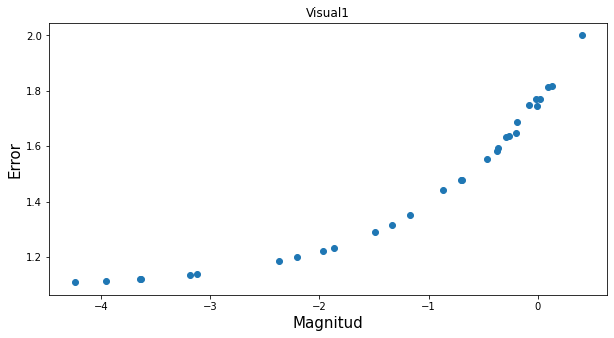

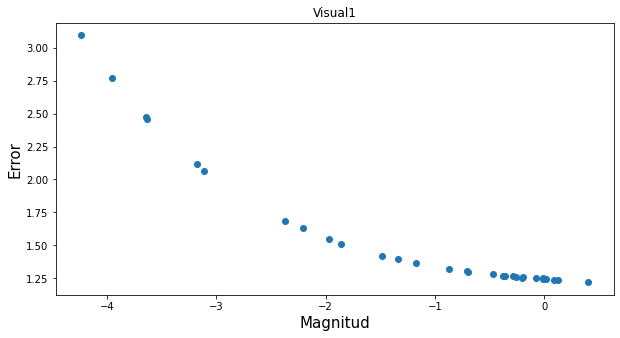

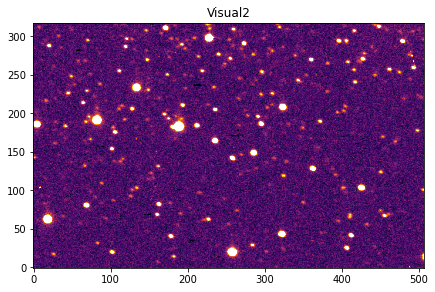

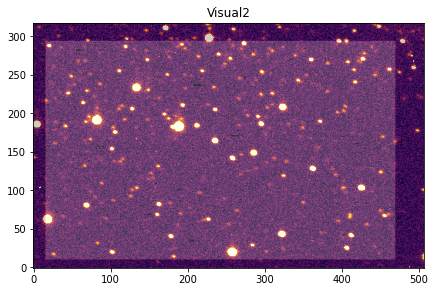

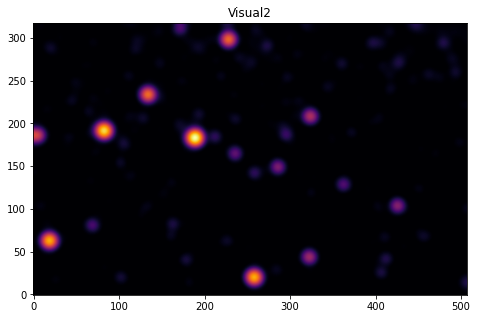

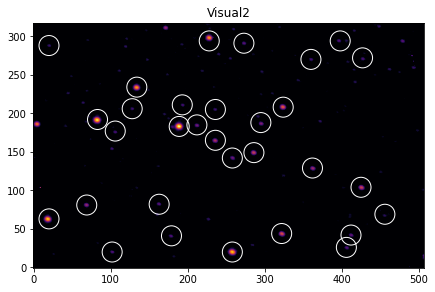

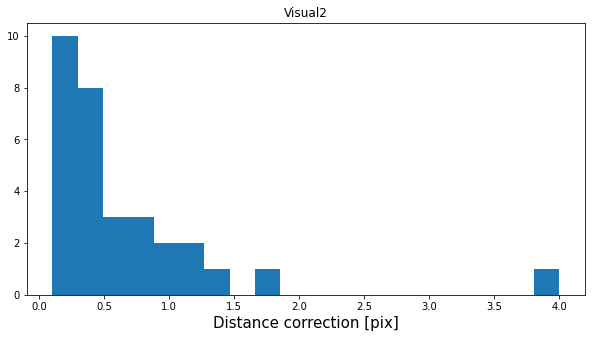

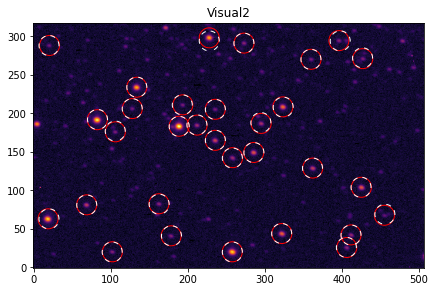

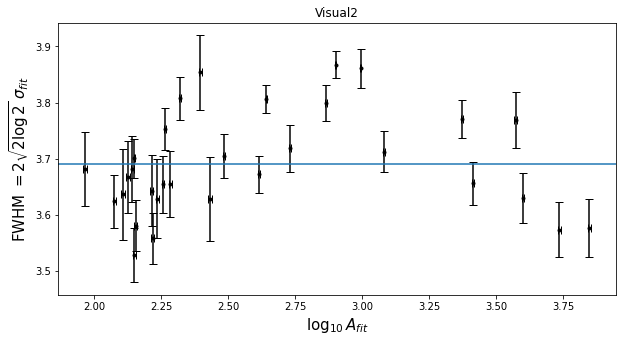

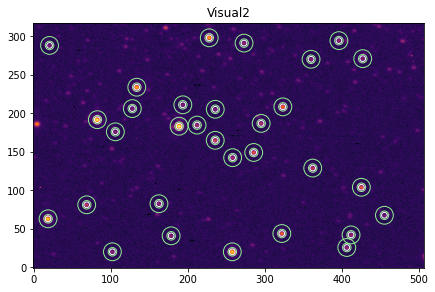

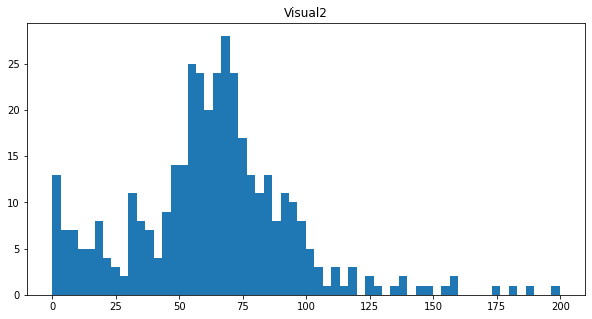

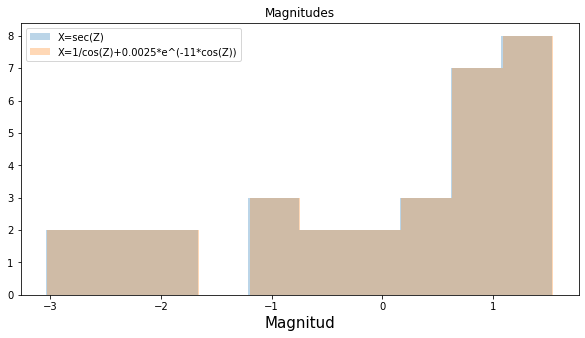

31
[-3.04037907 -2.75268523 -2.43687477 -2.44078251 -1.98238844 -1.92656596 -1.17204396 -1.01549199 -0.77427699
 -0.66448937 -0.30199657 -0.10404257  0.00891176  0.33046659  0.47522081  0.47502988  0.70305421  1.10878448
  0.89242604  1.02871262  0.85976258  0.84775245  0.95419773  1.16157741  1.03576151  1.16909966  1.22721452
  1.28186039  1.38079831  1.22392622  1.53506864]
[1.11606165 1.12221661 1.13059048 1.13102209 1.15016588 1.15250412 1.20843593 1.22134089 1.25333803 1.26813201
 1.33498369 1.37801458 1.40557763 1.50970986 1.55179987 1.54028753 1.63627624 1.86910153 1.73803931 1.82087854
 1.70347103 1.69999942 1.74695927 1.87217333 1.78861061 1.86671135 1.90532128 1.92035129 2.00025284 1.88422674
 2.10350167]
[-0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818
 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.01258818
 -0.01258818 -0.01258818 -0.01258818 -0.01258818 -0.0125

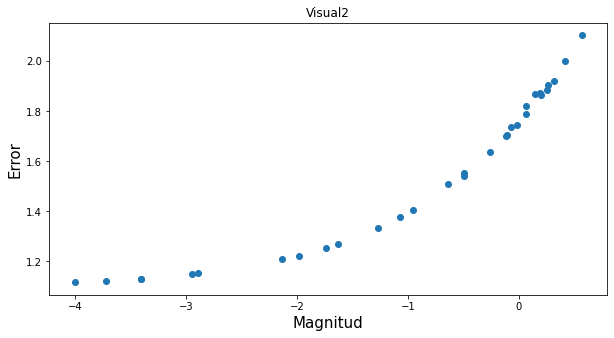

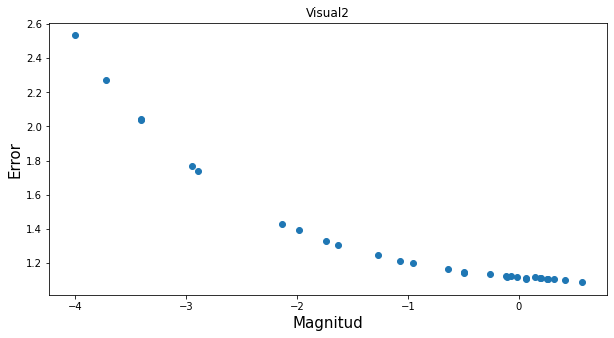

In [42]:
for i in range(len(nombres)):
    img=images[nombres[i]]- bias_model
    img /= flat
    X,Y = np.mgrid[:img.shape[0],:img.shape[1]]
    mask = (X>15) & (X<470) & (Y>10) & (Y<295)

    plt.figure(figsize=(7,7))
    quantile_imshow(img.T)#,vmin=300,vmax=600)
    plt.title(titles[i])
    plt.show()

    plt.figure(figsize=(7,7))
    quantile_imshow(img.T)#,vmin=300,vmax=600)
    plt.imshow(mask.T,alpha=0.2)
    plt.title(titles[i])
    plt.show()
    plt.imshow(ndi.gaussian_filter(img,5).T,vmin=50,norm="log")
    plt.title(titles[i])
    plt.show()


    peaks = peak_local_max(
        ndi.gaussian_filter(img,5),
        threshold_abs=60,
        labels=mask*1,
        min_distance=7,
        exclude_border=20)
    

    plt.figure(figsize=(7,7))
    plt.imshow(img.T,vmin=70,norm="log")    
    plt.scatter(*peaks.T,fc="none",ec="w",s=400)
    plt.title(titles[i])
    plt.show()

    centroids = np.array(
    centroid_sources((img-img.mean()).T,*peaks.T,centroid_func=centroid_quadratic,box_size=9)).T
    distances = np.hypot(*(peaks-centroids).T)
    plt.hist(distances,bins=20);
    plt.xlabel("Distance correction [pix]")
    plt.title(titles[i])
    plt.show()

    plt.figure(figsize=(7,7))
    plt.imshow(img.T,vmin=30,norm="log")
    plt.scatter(*centroids.T,fc="none",ec="r",s=400)
    plt.scatter(*peaks.T,fc="none",ec="w",s=400,linestyle=(5,(5,5)))
    plt.title(titles[i])
    plt.show()

    model = Const1D(100) + Gaussian1D(5e3,0,1.5)
    model.mean_1.fixed = True
    radii = np.arange(0,10,1)
    profile = RadialProfile(img.T,centroids[0],radii)
    fitted_model = fitter(model,profile.radius,profile.profile)

    params = []
    params_std = []
    for c in centroids:
        try:
            profile = RadialProfile(img.T,c,radii)
            fitted_model = fitter(model,profile.radius,profile.profile)
            params_std.append(np.sqrt(np.diag(fitter.fit_info["param_cov"])))
            params.append(fitted_model.parameters)
        except ValueError:
            pass
    #plt.plot(profile.radius,profile.gaussian_profile)
    #plt.plot(profile.radius,profile.profile,". k")
    #plt.show()
    #plt.close()

    params = np.asarray(params)
    params_std = np.asarray(params_std)


    x = np.log10(params.T[1])
    y = 2*np.sqrt(2*np.log(2))*params.T[3]
    dx = params_std.T[1]/params.T[1] / np.log(10)
    dy = 2*np.sqrt(2*np.log(2))*params_std.T[2]
    samples = np.random.normal(loc=y,scale=dy,size=(10_000,len(y)))
    means = samples.mean(axis=1)
    FWHM = means.mean()
    FWHM_err = means.std()

    plt.errorbar(x,y,dy,dx,fmt=". k",capsize=4)
    plt.xlabel("$\\log_{10} A_{fit}$")
    plt.ylabel("FWHM $= 2\\sqrt{2\\log 2}\\;\\sigma_{fit}$")
    plt.axhline(FWHM)
    plt.title(f"FWHM mean = ${FWHM:.3f}\\pm{FWHM_err:.3f}$")
    plt.title(titles[i])
    plt.show()

    min_distance=NearestNeighbors(n_neighbors=2).fit(centroids).kneighbors(centroids)[0][:,1].min()
    sky_apertures=CircularAnnulus(centroids,1.5*FWHM,0.85*(min_distance-FWHM))
    star_apertures=CircularAperture(centroids,FWHM)
    plt.figure(figsize=(7,7))
    plt.imshow(img.T,vmin=20,norm="log")
    sky_apertures.plot(color="lightgreen")
    star_apertures.plot(color="w")
    plt.title(titles[i])
    plt.show()

    sky_values=ApertureStats(img.T,sky_apertures).median
    star_values=ApertureStats(img.T,star_apertures).sum/star_apertures.area
    sky_values_err = ApertureStats(img.T,sky_apertures, sigma_clip=astrostats.SigmaClip()).median
    star_values_err = ApertureStats(img.T, star_apertures).sum / star_apertures.area

    sky=sky_apertures[0].to_mask().get_values(img.T)
    plt.hist(sky,60)
    plt.title(titles[i])
    plt.show()

    mag_instr=-2.5*np.log10((star_values-sky_values)/headers[nombres[i]]["EXPTIME"])
    

    Z=headers[nombres[i]]["ZD"]
    Z1=float(Z[0:2])
    Z2=float(Z[3:5])/60
    Z3=float(Z[6:11])/(60*60)
    Z_def=Z1+Z2+Z3
    Z_def=(Z_def*180/np.pi)
    X1=abs(1/(np.cos(Z_def)+(0.025*np.exp(-11*np.cos(Z_def)))))
    X2=abs(1/(np.cos(Z_def)))
    if i <=1:
        k=0.4
    else:
        k=0.2
    mag1=mag_instr+(k*X1)
    mag2=mag_instr+(k*X2)
    dif_mag=mag1-mag2
    plt.hist(mag1,alpha=0.3,label="X=sec(Z)")
    plt.hist(mag2,alpha=0.3,label="X=1/cos(Z)+0.0025*e^(-11*cos(Z))")
    plt.title("Magnitudes")
    plt.xlabel("Magnitud")
    plt.legend()
    plt.show()
    print(len(mag1))
    print(mag1)
    error=(5/2)*(1/np.log(10))*(np.sqrt((star_values_err**2)-(sky_values_err**2))/abs(sky_values-star_values))
    print(error)
    print(dif_mag)
    plt.scatter(mag_instr,error)
    plt.xlabel("Magnitud")
    plt.ylabel("Error")
    plt.title(titles[i])
    plt.show()

    background=np.sqrt(25)*np.std(bias-bias_model)
    background_image=np.ones_like(bias)*background
    imag_err=calc_total_error(img,background_image,10.5)
    star_errors = [np.linalg.norm( s.to_mask().get_values(imag_err.T)/ star_apertures.area ) for s in star_apertures]
    plt.scatter(mag_instr,star_errors)
    plt.xlabel("Magnitud")
    plt.ylabel("Error")
    plt.title(titles[i])
    plt.show()

    
